In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
import seaborn as sns


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

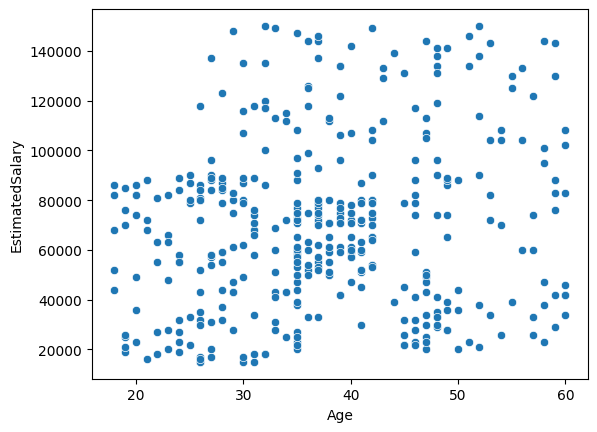

In [6]:
sns.scatterplot(x =df.iloc[:,0],y =df.iloc[:,1])

In [7]:
import matplotlib.pyplot as plt

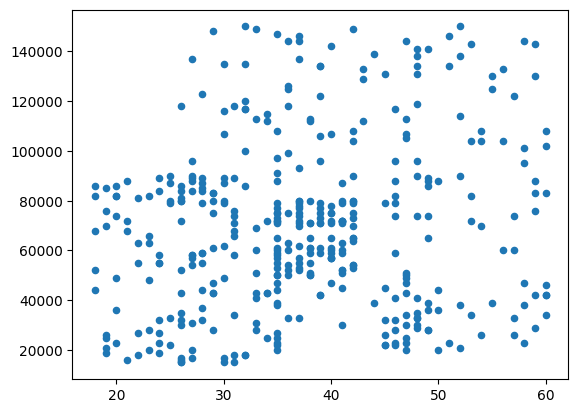

In [13]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],s = 20)

In [14]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 42)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =2))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5292 - loss: 406.2250 - val_accuracy: 0.3500 - val_loss: 466.4285
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4401 - loss: 403.0613 - val_accuracy: 0.6500 - val_loss: 272.8080
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4965 - loss: 247.0312 - val_accuracy: 0.6500 - val_loss: 212.7664
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6075 - loss: 237.9614 - val_accuracy: 0.3500 - val_loss: 193.7329
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5438 - loss: 156.3532 - val_accuracy: 0.3500 - val_loss: 186.3274
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4318 - loss: 168.6763 - val_accuracy: 0.3500 - val_loss: 152.4226
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4124 - loss: 181.1255 - val_accuracy: 0.6500 - val_loss: 241.7072
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5586 - loss: 139.

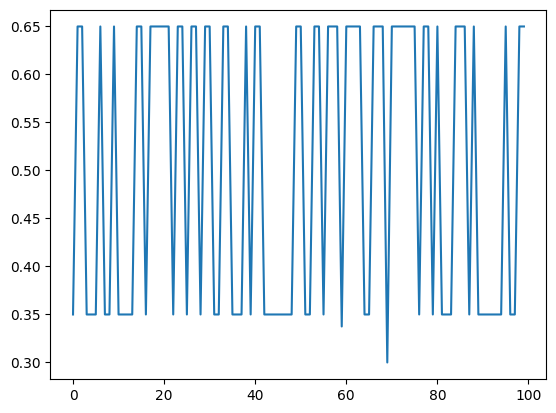

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

###applying scaling


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train_scaled

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

<Axes: >

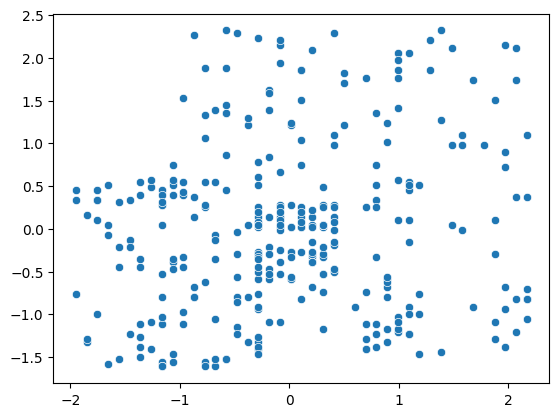

In [25]:
sns.scatterplot(x= x_train_scaled[:,0],y = x_train_scaled[:,1])

In [28]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim = 2))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train_scaled,y_train,validation_data = (x_test_scaled, y_test),epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5919 - loss: 0.6673 - val_accuracy: 0.8875 - val_loss: 0.6114
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8727 - loss: 0.6052 - val_accuracy: 0.8875 - val_loss: 0.5538
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8745 - loss: 0.5674 - val_accuracy: 0.9000 - val_loss: 0.5045
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8419 - loss: 0.5262 - val_accuracy: 0.8750 - val_loss: 0.4635
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8405 - loss: 0.4944 - val_accuracy: 0.9000 - val_loss: 0.4266
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8556 - loss: 0.4780 - val_accuracy: 0.9125 - val_loss: 0.3952
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8803 - loss: 0.4469 - val_accuracy: 0.9125 - val_loss: 0.3672
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8395 - loss: 0.4500 - val_accuracy: 0.9125 - val_loss: 0.

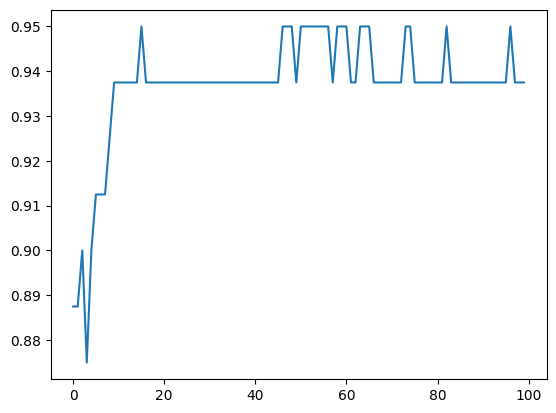

In [31]:
plt.plot(history.history['val_accuracy'])